In [ ]:
!unzip(/content/archive.zip)

/bin/bash: -c: line 0: syntax error near unexpected token `/content/archive.zip'
/bin/bash: -c: line 0: `unzip(/content/archive.zip)'


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('/content/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [5]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [6]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
df.shape

(200, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


<Axes: >

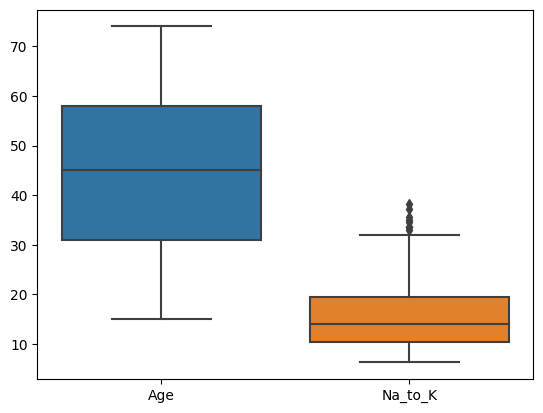

In [10]:
sns.boxplot(df)


In [11]:
q1 = df['Na_to_K'].quantile(.25)
q3 = df['Na_to_K'].quantile(.75)
IQR = q3 - q1
IQR

8.9345

In [12]:
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR

In [13]:
df.median()

<ipython-input-13-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Age        45.0000
Na_to_K    13.9365
dtype: float64

In [14]:
df['Na_to_K'] =np.where(df['Na_to_K']>upper_limit,13.9365,df['Na_to_K'])

<Axes: >

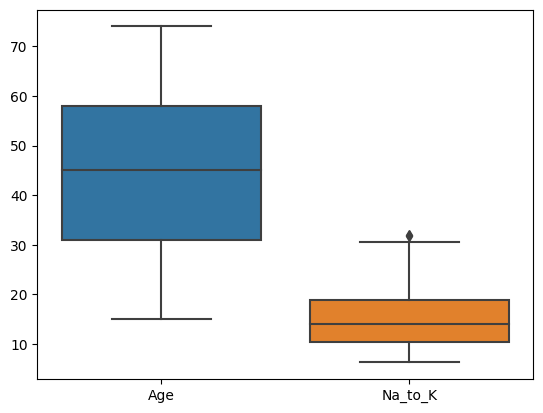

In [15]:
sns.boxplot(df)

In [16]:
df.shape

(200, 6)

<Axes: xlabel='Drug', ylabel='count'>

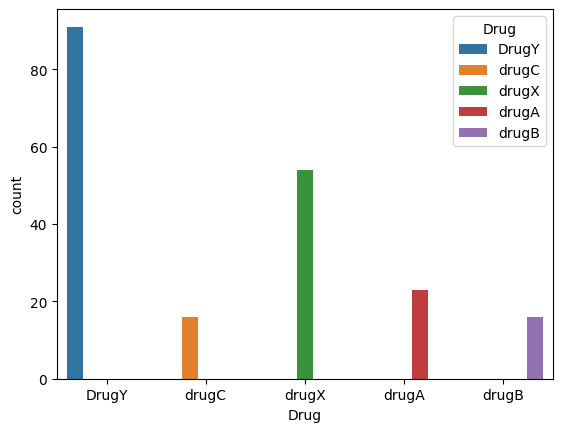

In [17]:
sns.countplot(x='Drug',data=df,hue='Drug')

In [ ]:
#consumption of Drug y is more and Drug B is less compared to all

<Axes: xlabel='Sex', ylabel='count'>

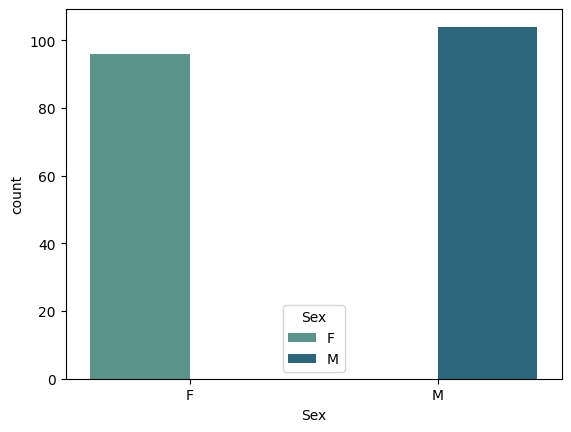

In [18]:
sns.countplot(x='Sex', data=df, palette='crest', hue='Sex')

<Axes: xlabel='BP', ylabel='count'>

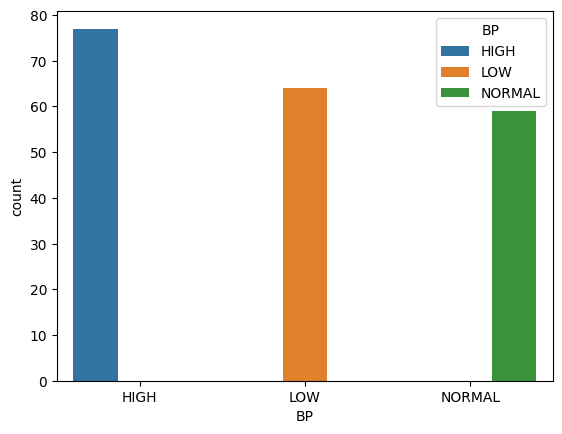

In [19]:
sns.countplot(x='BP', data=df, hue='BP')

<Axes: xlabel='Na_to_K', ylabel='Count'>

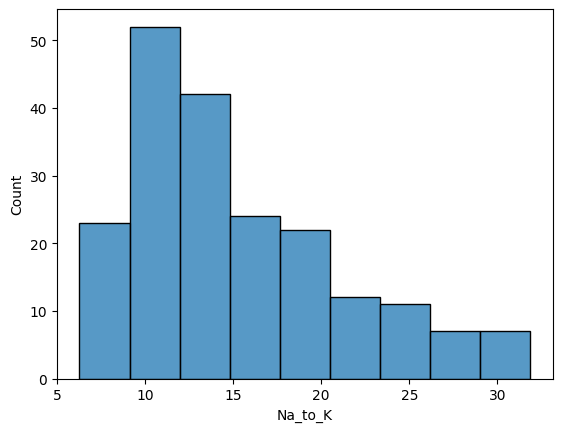

In [20]:
sns.histplot(x='Na_to_K', data=df)

In [21]:
X = df.drop(columns = ['Drug'],axis=1)
Y = df['Drug']

In [22]:
Y_class = len(np.unique(Y))
print(Y_class)

5


In [23]:
X = pd.get_dummies(X,columns=['Sex','BP','Cholesterol'],drop_first = True)

LE = LabelEncoder()
Y = LE.fit_transform(Y)

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split (X,Y,test_size=0.3,random_state=2)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [26]:
Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

In [27]:
model = Sequential()
model.add(Dense(48, input_dim=6, activation='relu'))
model.add(Dense(36, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(12, activation='relu'))
output_layer = Dense(Y_class,activation='softmax')
model.add(output_layer)

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                336       
                                                                 
 dense_1 (Dense)             (None, 36)                1764      
                                                                 
 dense_2 (Dense)             (None, 24)                888       
                                                                 
 dense_3 (Dense)             (None, 12)                300       
                                                                 
 dense_4 (Dense)             (None, 5)                 65        
                                                                 
Total params: 3,353
Trainable params: 3,353
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
model.fit(X_train,Y_train,epochs=66,batch_size=6)

Epoch 1/66
24/24 [==============================] - 0s 2ms/step - loss: 8.3786e-07 - accuracy: 1.0000
Epoch 2/66
24/24 [==============================] - 0s 2ms/step - loss: 7.8337e-07 - accuracy: 1.0000
Epoch 3/66
24/24 [==============================] - 0s 2ms/step - loss: 7.8848e-07 - accuracy: 1.0000
Epoch 4/66
24/24 [==============================] - 0s 2ms/step - loss: 7.9529e-07 - accuracy: 1.0000
Epoch 5/66
24/24 [==============================] - 0s 2ms/step - loss: 8.4723e-07 - accuracy: 1.0000
Epoch 6/66
24/24 [==============================] - 0s 2ms/step - loss: 7.2632e-07 - accuracy: 1.0000
Epoch 7/66
24/24 [==============================] - 0s 2ms/step - loss: 7.7400e-07 - accuracy: 1.0000
Epoch 8/66
24/24 [==============================] - 0s 2ms/step - loss: 7.2887e-07 - accuracy: 1.0000
Epoch 9/66
24/24 [==============================] - 0s 2ms/step - loss: 7.0078e-07 - accuracy: 1.0000
Epoch 10/66
24/24 [==============================] - 0s 2ms/step - loss: 7.1270e-0

In [48]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc * 100)

2/2 [==============================] - 0s 6ms/step - loss: 1.8387 - accuracy: 0.8500
Test accuracy: 85.00000238418579
